In [66]:
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, END

In [67]:
class AgentState(BaseModel):
    name: str
    age: int
    company: str
    skills: list[str]
    result: str | None = None

In [68]:
def first_node(state: AgentState) -> AgentState:
    state.result = f"{state.name}, Welcome to the {state.company}! "
    return state

In [69]:
def second_node(state: AgentState) -> AgentState:
    state.result += f"Your age is {state.age}. "
    return state

In [70]:
def third_node(state: AgentState) -> AgentState:
    state.result += f"You are skilled in: {state.skills}"
    return state

In [71]:
graph = StateGraph(AgentState)

graph.add_node('node 1', first_node)
graph.add_node('node 2', second_node)
graph.add_node('node 3', third_node)

graph.set_entry_point("node 1")
graph.add_edge("node 1", "node 2")
graph.add_edge("node 2", "node 3")
graph.set_finish_point("node 3")

app = graph.compile()

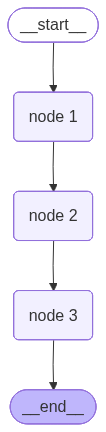

In [72]:
app

In [73]:
response = app.invoke({
    "name": "yash",
    "company": "tata",
    "age": 24,
    "skills": ["python", "rust", "java"]
})

In [74]:
response

{'name': 'yash',
 'age': 24,
 'company': 'tata',
 'skills': ['python', 'rust', 'java'],
 'result': "yash, Welcome to the tata! Your age is 24. You are skilled in: ['python', 'rust', 'java']"}

In [75]:
response["result"]

"yash, Welcome to the tata! Your age is 24. You are skilled in: ['python', 'rust', 'java']"